In [5]:
import sys
import os

# Add the parent folder to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


import density_generator
import numpy as np
import matplotlib.pyplot as plt
import qutip
import importlib
importlib.reload(density_generator)

n=2
a_x=1
h_z=0.1
delta=0.01
m=1
DEBUG=False
trace_out_index=[np.floor(n/2).astype(int)]
trace_out_index=[0]
derivative_delta=None

model = density_generator.IsingQuantumState(
        n=n, a_x=a_x, h_z=h_z, trace_out_index=trace_out_index
    )

In [6]:
rho = model.generate_density_matrix() # pure

In [7]:
rho

array([[0.30200658+9.18061522e-19j, 0.        -0.00000000e+00j,
        0.        -0.00000000e+00j, 0.13959868+4.37390915e-01j],
       [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
        0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
       [0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
        0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
       [0.13959868-4.37390915e-01j, 0.        -0.00000000e+00j,
        0.        -0.00000000e+00j, 0.69799342+2.07024993e-34j]])

In [8]:
purity = np.trace(rho @ rho)
participation_ratio = 1 / purity

print("Participation Ratio:", np.real(participation_ratio))

Participation Ratio: 0.9999999999999996


In [9]:
rho, rho_delta = model.generate_mixed(delta=0)
purity_mixed = np.trace(rho @ rho)
participation_ratio_mixed = 1 / purity_mixed
print("Participation Ratio Mixed:", np.real(participation_ratio_mixed))

Participation Ratio Mixed: 1.7288989899799112


In [10]:
rho

array([[0.30200658+9.18061522e-19j, 0.        +0.00000000e+00j],
       [0.        +0.00000000e+00j, 0.69799342+2.07024993e-34j]])

In [11]:
N = 100
pr = np.zeros(N)
for i in range(N): 
    n=8
    a_x=1
    h_z= np.random.rand()
    delta=0.01
    m=1
    DEBUG=False
    trace_out_index=[3,4]
    derivative_delta= 0.001
    model = density_generator.IsingQuantumState(
            n=n, a_x=a_x, h_z=h_z, trace_out_index=trace_out_index
        )
    rho, rho_delta = model.generate_mixed(delta=0)
    purity_mixed = np.trace(rho @ rho)
    participation_ratio_mixed = np.real(1 / purity_mixed)
    pr[i] = participation_ratio_mixed

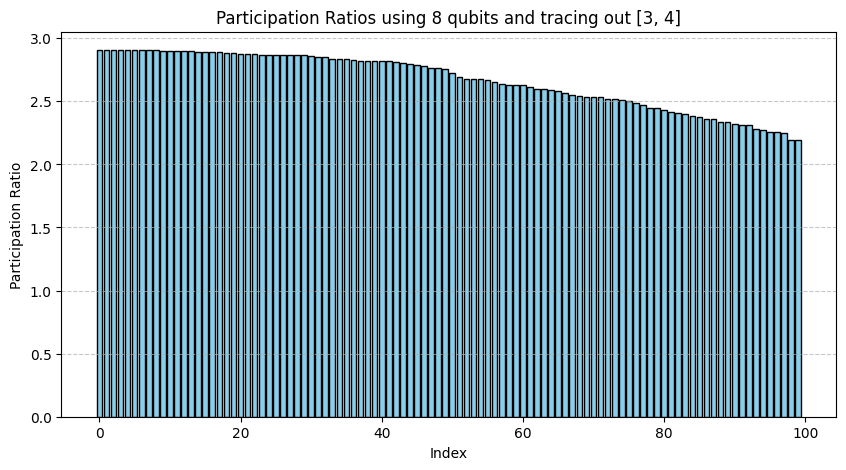

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(pr)), np.sort(pr)[::-1], color='skyblue', edgecolor='black')
plt.xlabel('Index')
plt.ylabel('Participation Ratio')
plt.title(f'Participation Ratios using {n} qubits and tracing out {trace_out_index}')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
## n = 7 qubits, trace out [0]
# count	100.000000
# mean	1.838738
# std	0.107537
# min	1.601216
# 25%	1.756050
# 50%	1.822440
# 75%	1.945202
# max	1.999864

## n = 7 qubits, trace out [1]
# mean	1.766957
# std	0.177792
# min	1.423465
# 25%	1.617972
# 50%	1.841976
# 75%	1.915887
# max	1.9416871

## n = 7 qubits, trace out [3]
# mean	1.786926
# std	0.119588
# min	1.562010
# 25%	1.677341
# 50%	1.799071
# 75%	1.900339
# max	1.941591

## n = 8 qubits, trace out [0,1]
# mean	1.913080
# std	0.106616
# min	1.705710
# 25%	1.828603
# 50%	1.948647
# 75%	2.001226
# max	2.038025

## n = 8 qubits, trace out [3,4]
# mean	2.641061
# std	0.234806
# min	2.166899
# 25%	2.439464
# 50%	2.718187
# 75%	2.850458
# max	2.905816


## n = 8 qubits, trace out [0,4]
#mean	3.385831
#std	0.275687
#min	2.544192
#25%	3.319898
#50%	3.476673
#75%	3.585904
#max	3.663567

import pandas as pd
pd.DataFrame(pr).describe()

,0
count,100.000000
mean,2.641061
std,0.234806
min,2.166899
25%,2.439464
50%,2.718187
75%,2.850458
max,2.905816
